In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
p_dates = ['ReadingDateTime']
w_dates = ['DATE']
pdata = pd.read_csv('drive/My Drive/MSC_IoT_QMUL/Data_Analytics/pollution-1.csv',parse_dates=p_dates)
wdata = pd.read_csv('drive/My Drive/MSC_IoT_QMUL/Data_Analytics/weather-1.csv',parse_dates=w_dates)
# data.head()

In [71]:
wdata.shape[0]

34446

In [78]:
no_data = pdata[pdata.Species=='NO2']
oz_data = pdata[pdata.Species=='O3']
pm_data = pdata[pdata.Species=='PM2.5']
no_data.shape[0]
oz_data.shape[0]
pm_data.shape[0]

17520

In [61]:
# pdata[pdata.Value.isnull()].shape[0]
mask = wdata.index%2==0
wdata=wdata[mask]

# wdata.reset_index(drop=True)
#wdata.head()

# wdata['index'] = np.arange(0,wdata.shape[0])
# wdata.set_index('index')
# wdata.head()
# wdata.info()
wdata = wdata.reset_index(drop=True)
wdata.head()

,DATE,DEW,TMP,WND
0,2017-01-01 00:20:00,"+0050,1","+0080,1","230,1,N,0046,1"
1,2017-01-01 02:20:00,"+0050,1","+0070,1","240,1,N,0046,1"
2,2017-01-01 04:20:00,"+0040,1","+0070,1","220,1,N,0036,1"
3,2017-01-01 06:20:00,"+0050,1","+0070,1","240,1,V,0036,1"
4,2017-01-01 08:20:00,"+0060,1","+0080,1","220,1,V,0031,1"


In [67]:
data = pd.concat([pdata['ReadingDateTime'],no_data], axis=1).drop(['Units','Provisional or Ratified','DATE'],axis=1)
data.head()

,Site,Species,ReadingDateTime,Value,DEW,TMP,WND
0,TH4,NO2,2017-01-01 00:00:00,38.9,"+0050,1","+0080,1","230,1,N,0046,1"
1,TH4,NO2,2017-01-01 01:00:00,63.0,"+0050,1","+0070,1","240,1,N,0046,1"
2,TH4,NO2,2017-01-01 02:00:00,47.9,"+0040,1","+0070,1","220,1,N,0036,1"
3,TH4,NO2,2017-01-01 03:00:00,51.0,"+0050,1","+0070,1","240,1,V,0036,1"
4,TH4,NO2,2017-01-01 04:00:00,42.8,"+0060,1","+0080,1","220,1,V,0031,1"


In [69]:
data.shape[0]

52560

In [ ]:
grouping = (pd.Grouper(key='ReadingDateTime', freq='D'))
data['mean_per_day'] = data.groupby(grouping).apply(lambda df: df['Value'].mean())

In [ ]:
data['mean_per_day'].unique()

array([nan])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
Unnamed: 0       1048575 non-null int64
DatetimeBegin    1048575 non-null datetime64[ns]
DatetimeEnd      1048575 non-null datetime64[ns]
Concentration    1048575 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 32.0 MB


In [ ]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
Unnamed: 0       1048575 non-null int64
DatetimeBegin    1048575 non-null datetime64[ns]
DatetimeEnd      1048575 non-null datetime64[ns]
Concentration    1048575 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 32.0 MB


In [ ]:
data.info()

AttributeError: ignored

In [ ]:
#Date Range of dataset

data['DatetimeBegin'].min(), data['DatetimeBegin'].max()

('1/1/2013 10:00', '9/9/2015 9:00')

In [ ]:
#plt.plot()
data['Concentration'].count()

1048575

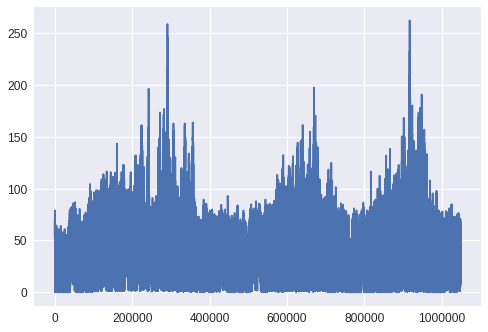

In [ ]:
plt.plot(list(range(0,data['Concentration'].count())),data['Concentration'].tolist())
plt.show()



In [ ]:
# #Extracting Day of the week as a list + Adding it as a feature

# data['day_of_week'] =  pd.to_datetime(data['DatetimeBegin']).dt.dayofweek
# data['month_of_the_year'] = pd.to_datetime(data['DatetimeBegin']).dt.month
# data

In [ ]:
#Dates that recorded concentration in the dataset
pd.to_datetime(data['DatetimeBegin']).dt.strftime("%y").unique()

KeyboardInterrupt: ignored

Number of days recorded - 1095

Expected - 1095 (So no missing dates)

Number of years recorded - 3 - (2013,2014,2015)

Number of unique month-year recorded - 36

In [ ]:
cols = ['DatetimeEnd']
data.drop(cols, axis=1, inplace=True)
data.head()

,Unnamed: 0,DatetimeBegin,Concentration
0,0,1/1/2013 1:00,54.0
1,1,1/1/2013 1:00,54.0
2,2,1/1/2013 1:00,62.5
3,3,1/1/2013 1:00,62.5
4,4,1/1/2013 1:00,68.0


In [ ]:
data=data.sort_values('DatetimeBegin')
data.dtypes()

AttributeError: ignored

In [ ]:
data.drop(0)
data.head(5)


,Unnamed: 0,DatetimeBegin,DatetimeEnd,Concentration
0,0,1/1/2013 1:00,1/1/2013 2:00,54.0
1,1,1/1/2013 1:00,1/1/2013 2:00,54.0
2,2,1/1/2013 1:00,1/1/2013 2:00,62.5
3,3,1/1/2013 1:00,1/1/2013 2:00,62.5
4,4,1/1/2013 1:00,1/1/2013 2:00,68.0


In [ ]:
#Represent all the values of an hour's concentration value by its mean

grouping = (pd.Grouper(key='DatetimeBegin', freq='H'))
data = data.groupby(grouping,group_keys=False).apply(lambda df: df['Concentration'].mean())

In [ ]:

data.head(5)

DatetimeBegin
2013-01-01 01:00:00    63.836066
2013-01-01 02:00:00    62.855932
2013-01-01 03:00:00    61.118644
2013-01-01 04:00:00    59.663934
2013-01-01 05:00:00    57.467213
Freq: H, dtype: float64